In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.8 MB/s eta 0:00:00


In [2]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# 1️⃣ Imports
# -------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

In [3]:

# -------------------------
# 2️⃣ Helper Function
# -------------------------
def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    # Build circuit for measurement
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector before measurement
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard, statevector:", state_after.data)

    # Visualizations
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation with AerSimulator
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")

--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


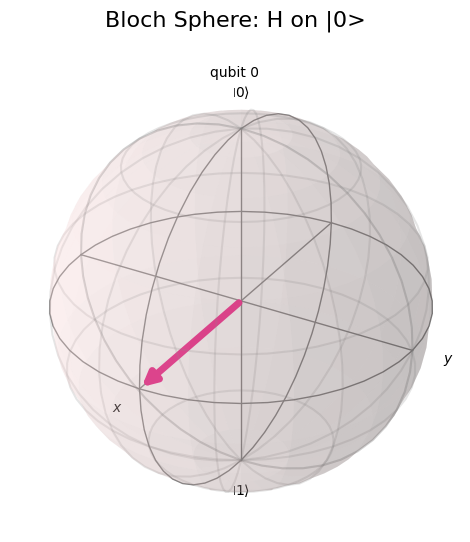

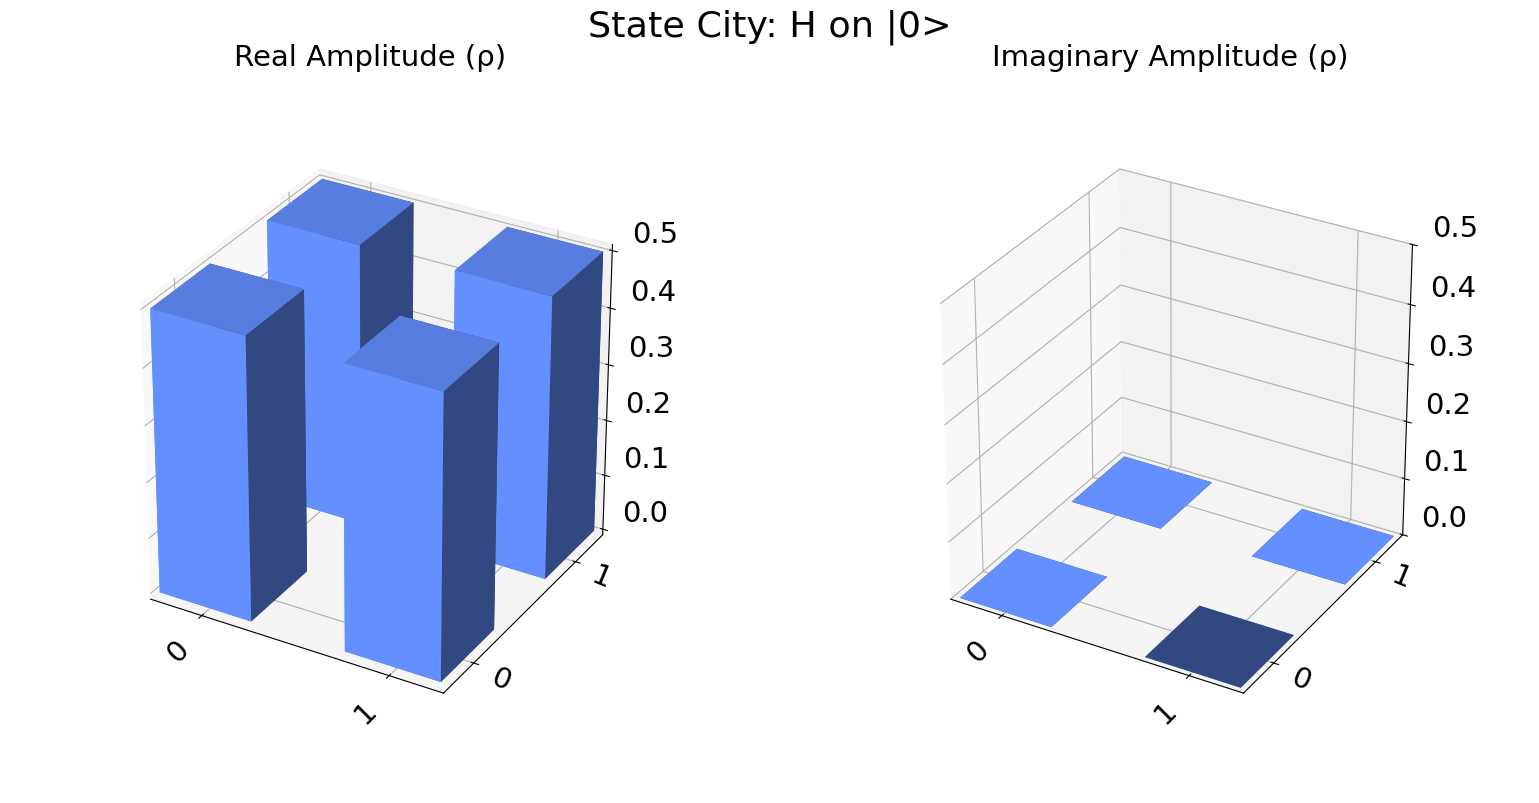

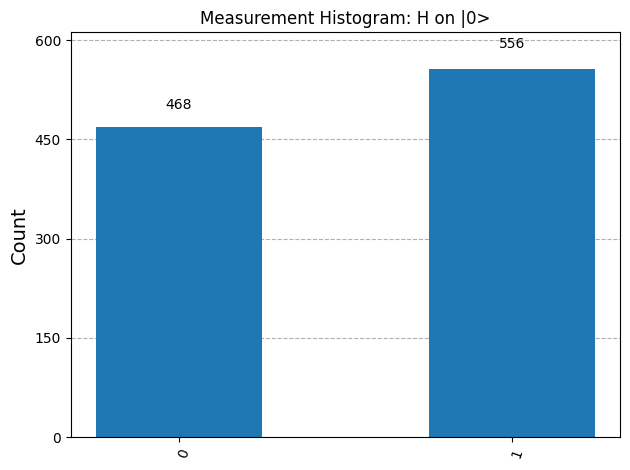



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


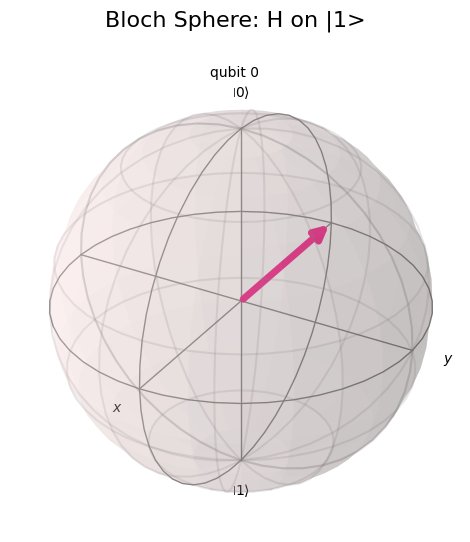

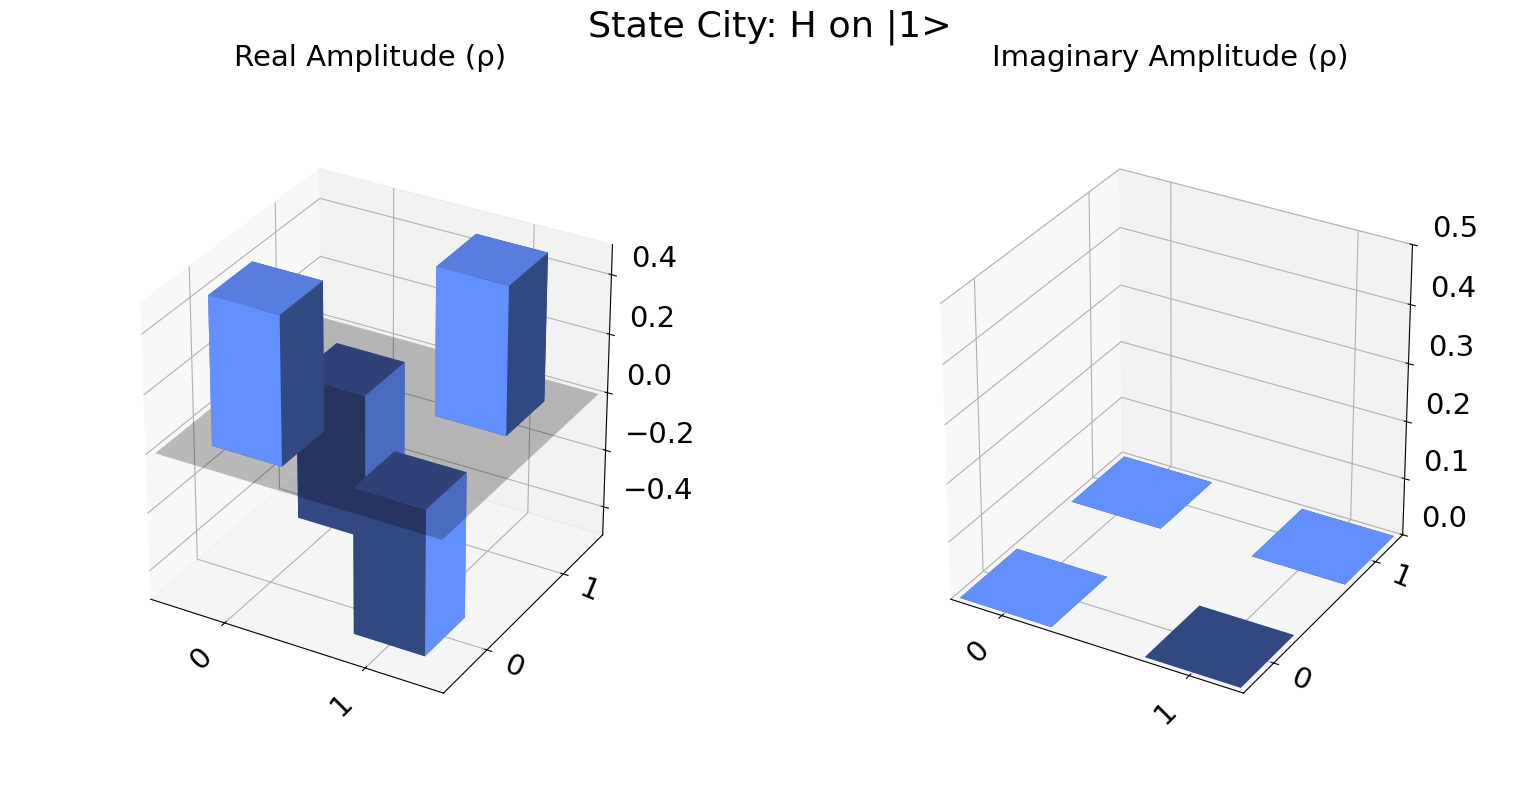

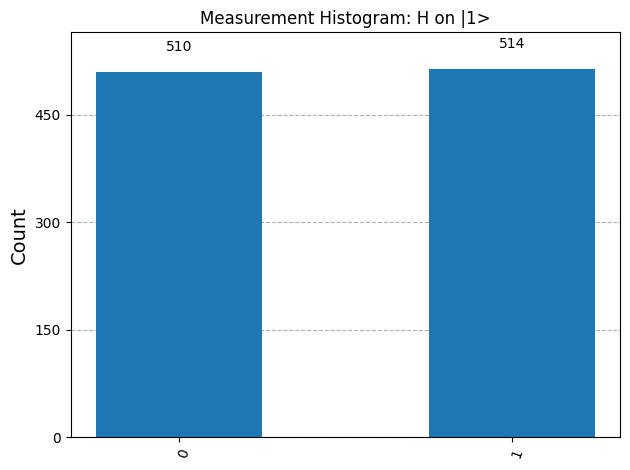



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


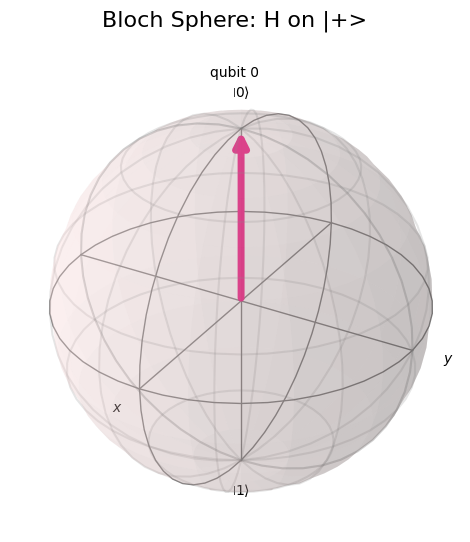

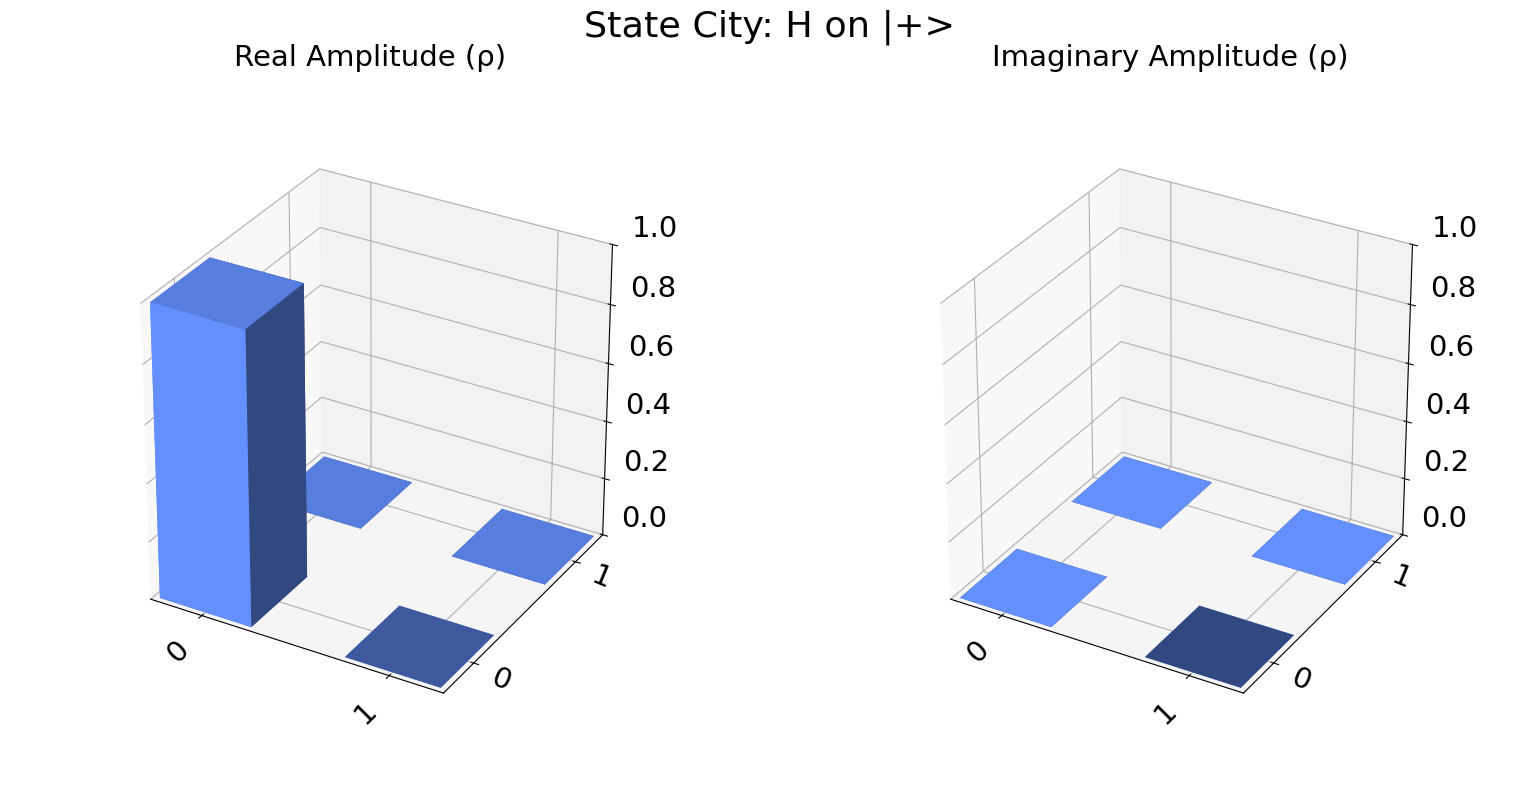

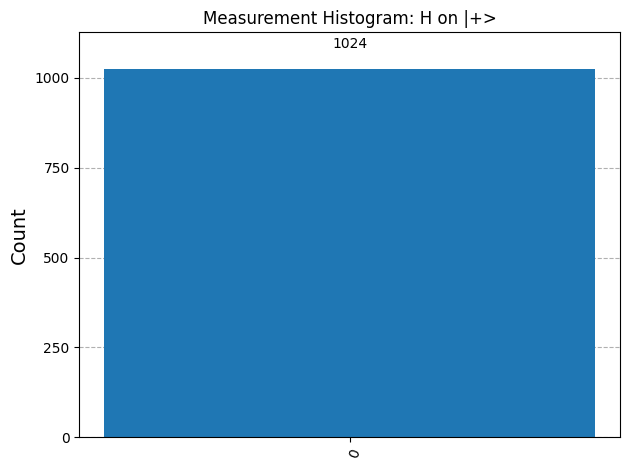



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


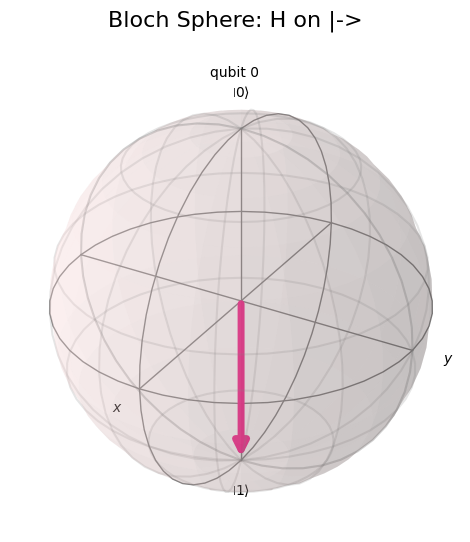

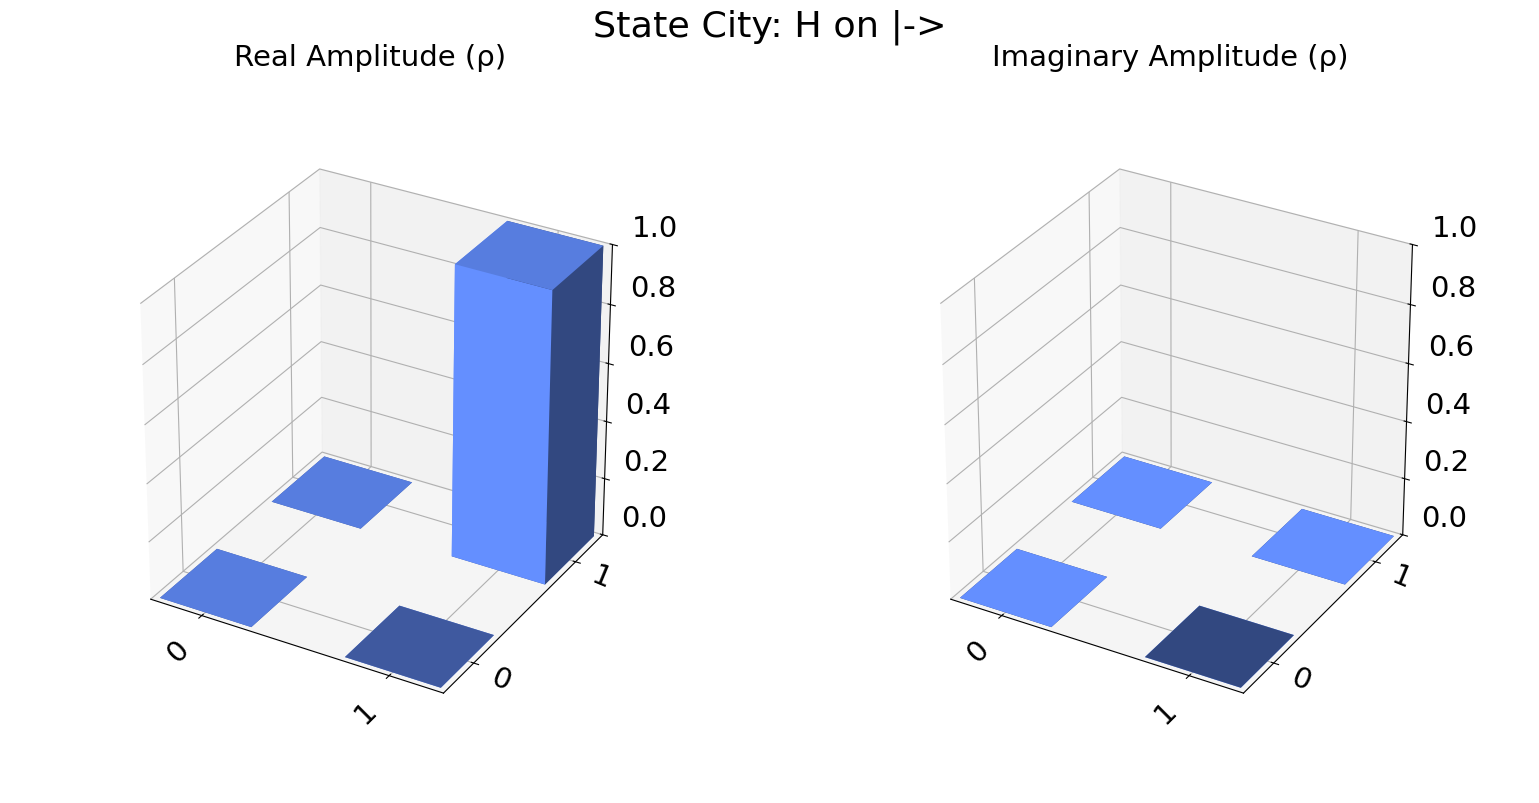

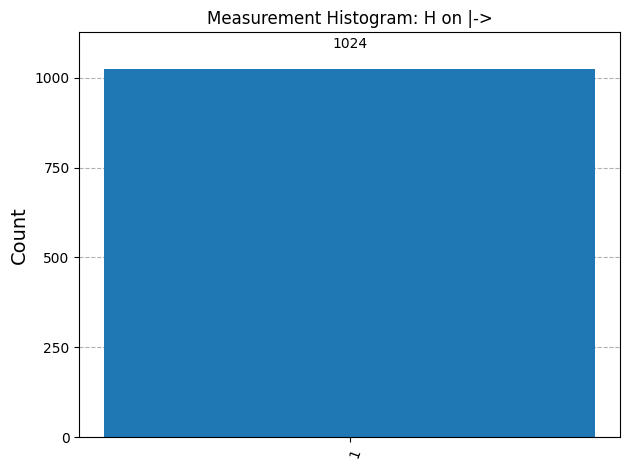

In [4]:
# -------------------------
# 3️⃣ Single Qubit Examples
# -------------------------

# |0>
visualize_hadamard(np.array([1, 0]), "|0>")

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")

# |+> = (|0> + |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

# |-> = (|0> - |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


--- Two-Qubit H⊗H on |00> ---
Statevector: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


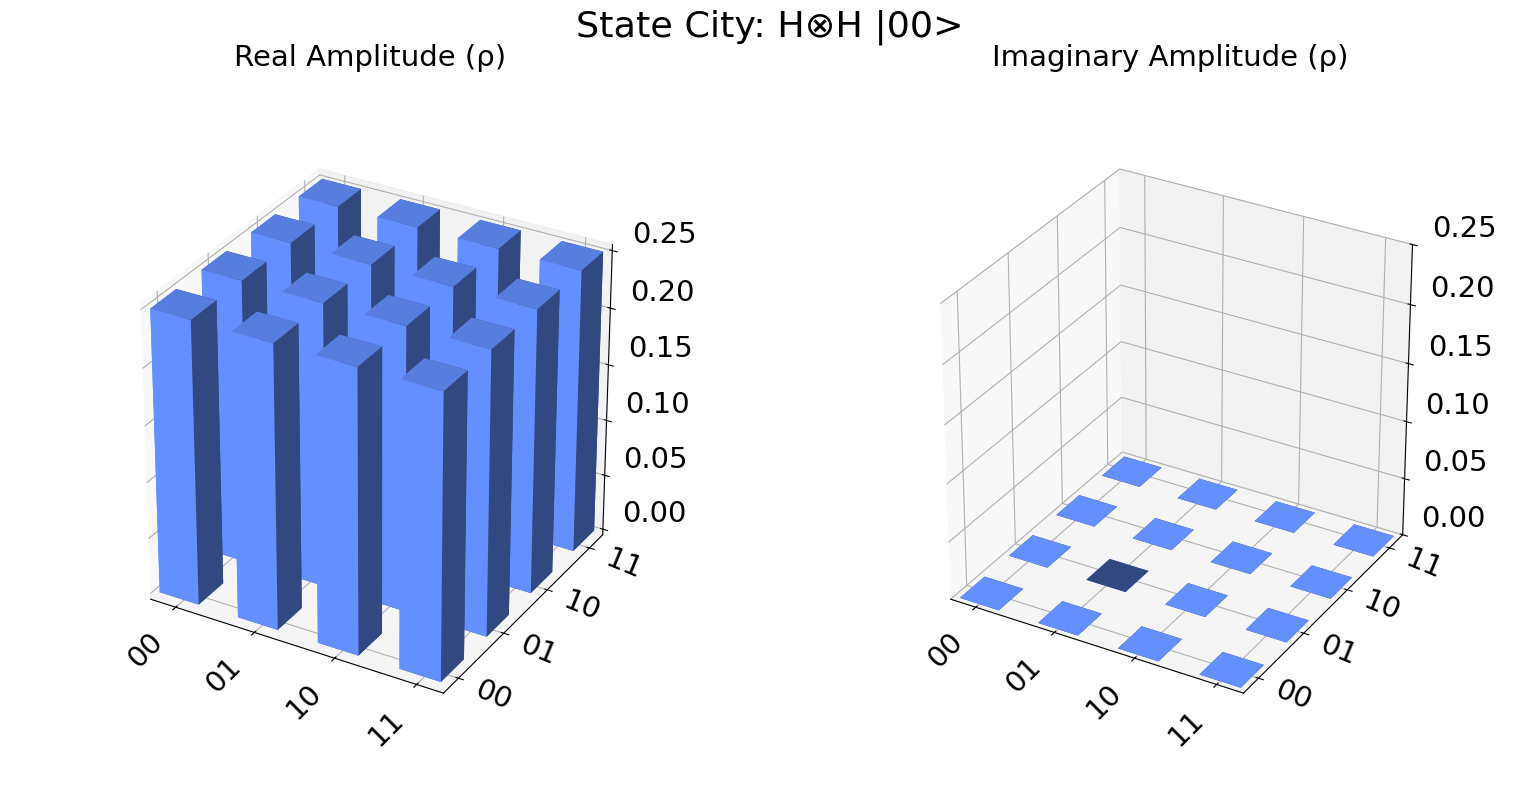

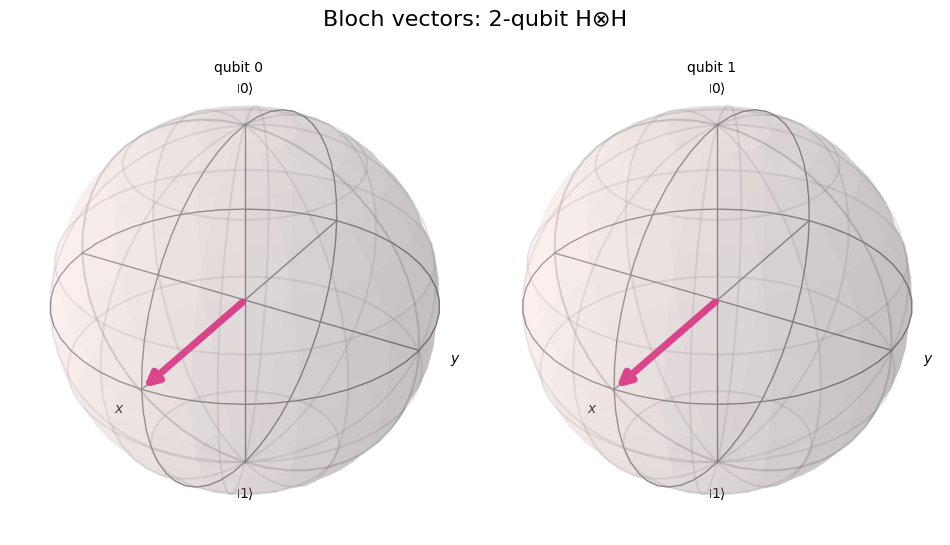

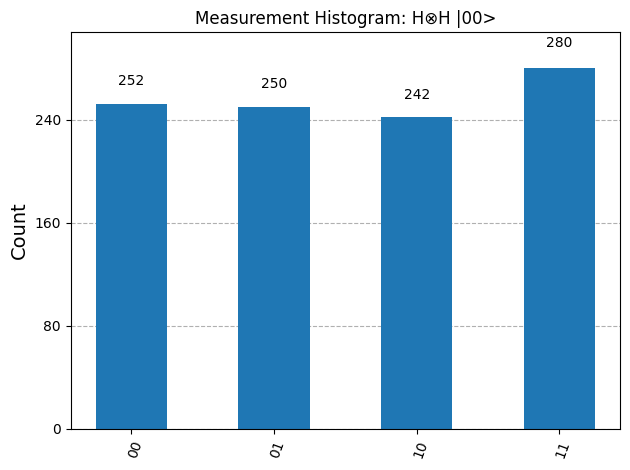


Analytical: equal probability for |00>, |01>, |10>, |11>.



In [5]:

# -------------------------
# 4️⃣ Two Qubit System: H⊗H
# -------------------------
qc2 = QuantumCircuit(2, 2)
qc2.h([0, 1])
qc2.measure([0, 1], [0, 1])

# Statevector before measurement
qc2_state = QuantumCircuit(2)
qc2_state.h([0, 1])
state2 = Statevector.from_instruction(qc2_state)

print("--- Two-Qubit H⊗H on |00> ---")
print("Statevector:", state2.data)

display(plot_state_city(state2, title="State City: H⊗H |00>"))
display(plot_bloch_multivector(state2, title="Bloch vectors: 2-qubit H⊗H"))

# Simulation
sim = AerSimulator()
qc2_t = transpile(qc2, sim)
result2 = sim.run(qc2_t, shots=1024).result()
counts2 = result2.get_counts()
display(plot_histogram(counts2, title="Measurement Histogram: H⊗H |00>"))
print("\nAnalytical: equal probability for |00>, |01>, |10>, |11>.\n")


--- Bell State (|00> + |11>)/√2 ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


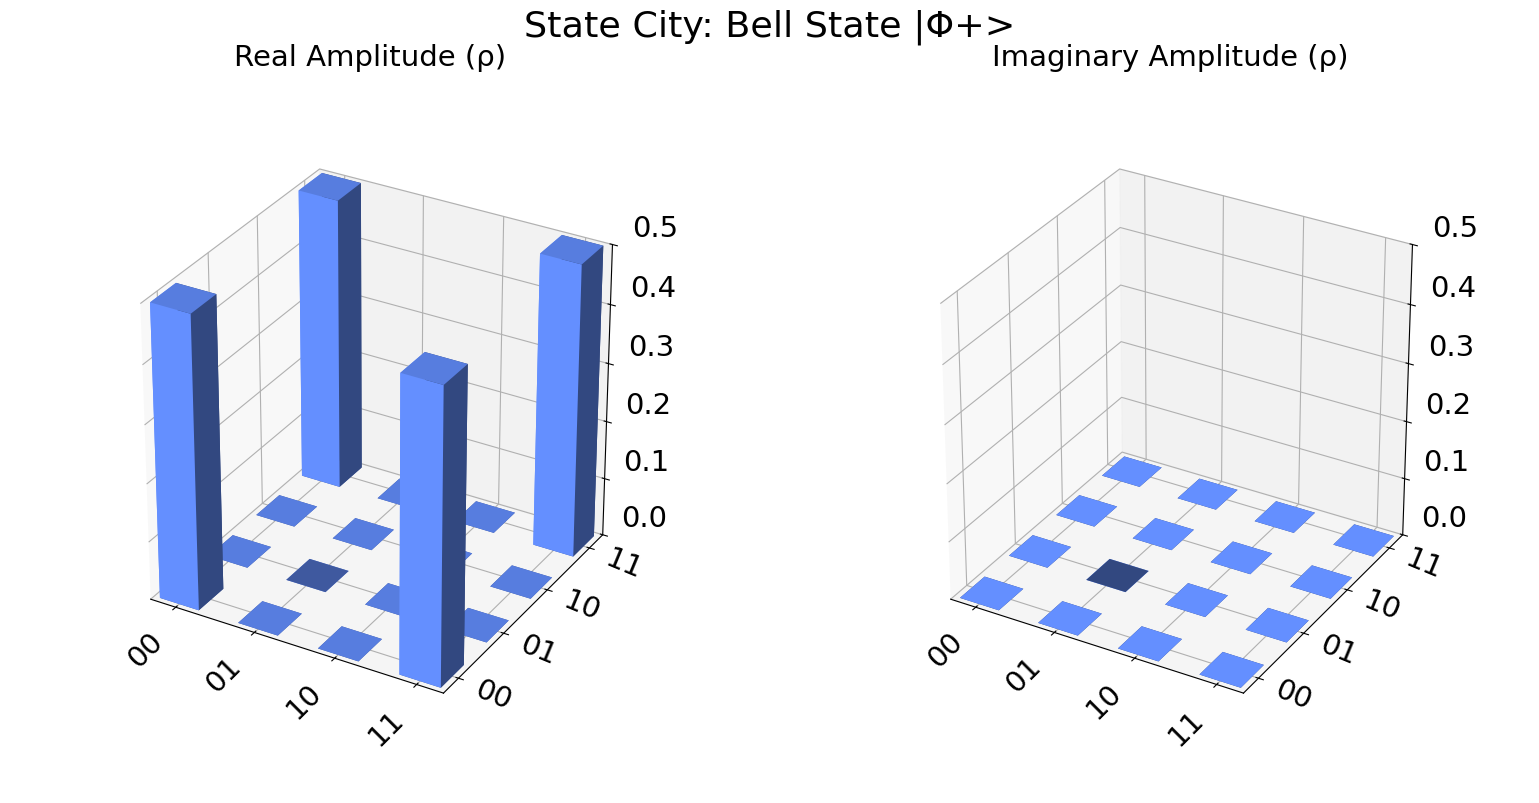

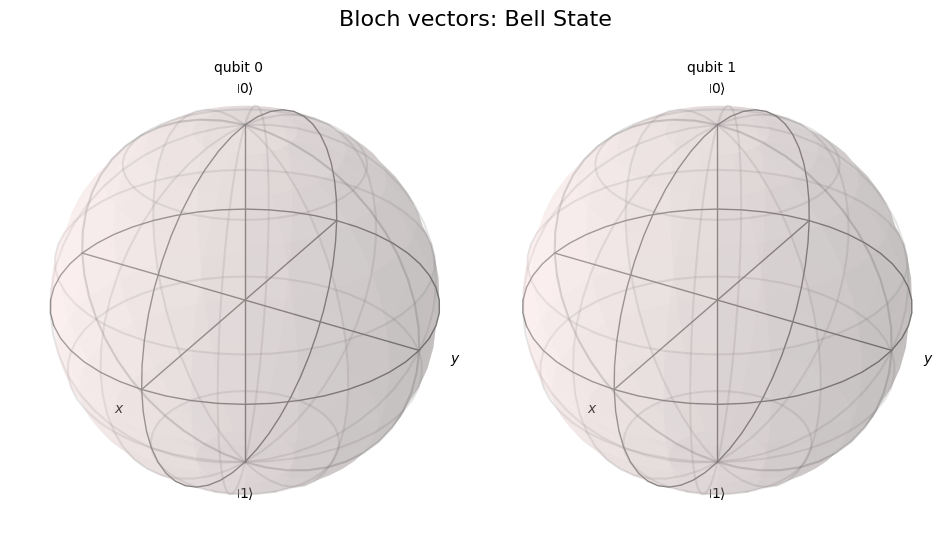

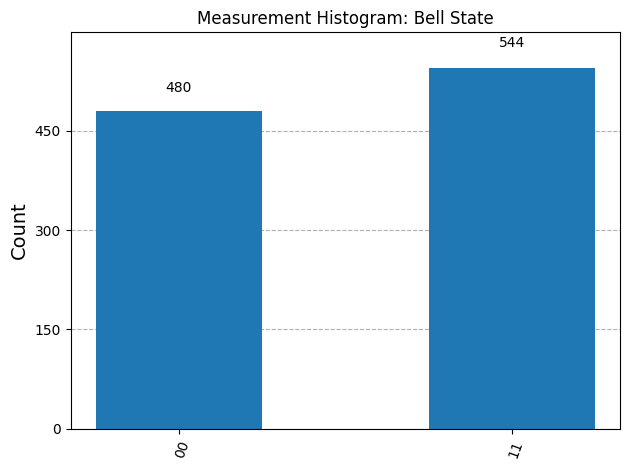


Analytical: outcomes |00> and |11> only, perfectly correlated.



In [6]:
# -------------------------
# 5️⃣ Entangled State (Bell Pair): H + CNOT
# -------------------------
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)    # Hadamard on first qubit
qc_ent.cx(0, 1)  # CNOT: entangle qubits
qc_ent.measure([0, 1], [0, 1])

# Statevector before measurement
qc_ent_state = QuantumCircuit(2)
qc_ent_state.h(0)
qc_ent_state.cx(0, 1)
state_ent = Statevector.from_instruction(qc_ent_state)

print("--- Bell State (|00> + |11>)/√2 ---")
print("Statevector:", state_ent.data)

display(plot_state_city(state_ent, title="State City: Bell State |Φ+>"))
display(plot_bloch_multivector(state_ent, title="Bloch vectors: Bell State"))

# Simulation
qc_ent_t = transpile(qc_ent, sim)
result_ent = sim.run(qc_ent_t, shots=1024).result()
counts_ent = result_ent.get_counts()
display(plot_histogram(counts_ent, title="Measurement Histogram: Bell State"))
print("\nAnalytical: outcomes |00> and |11> only, perfectly correlated.\n")


TASK 1

--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


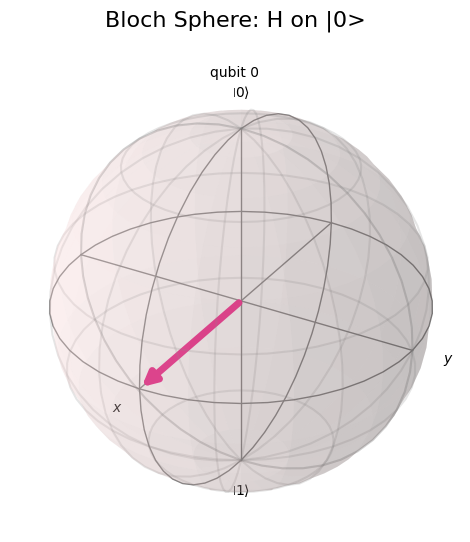

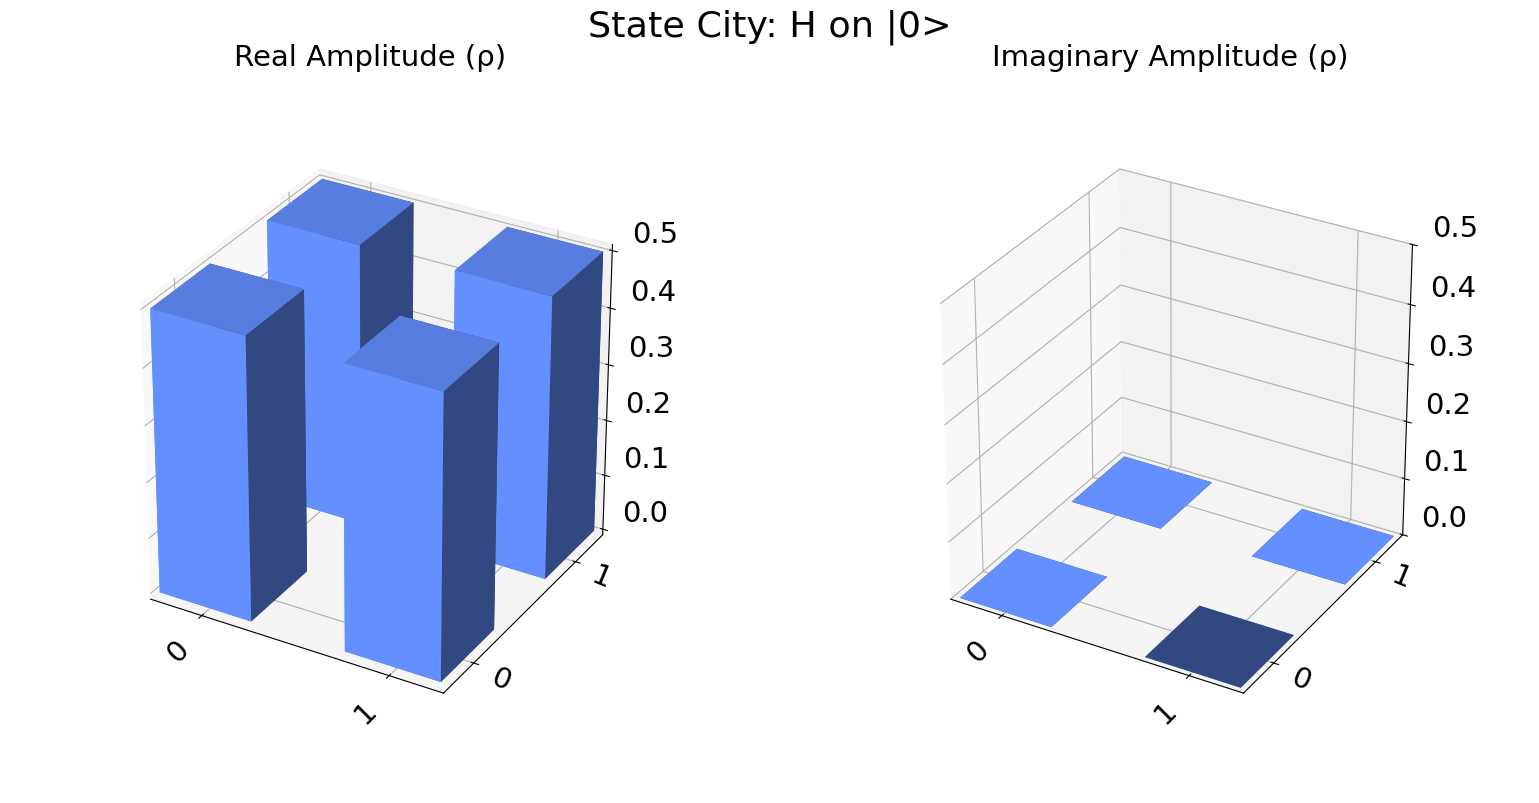

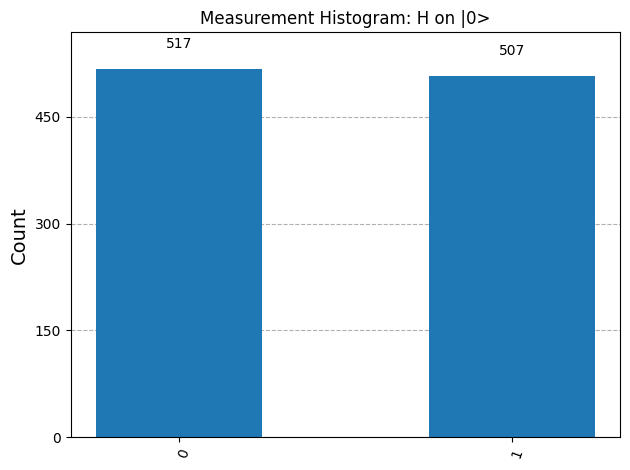



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


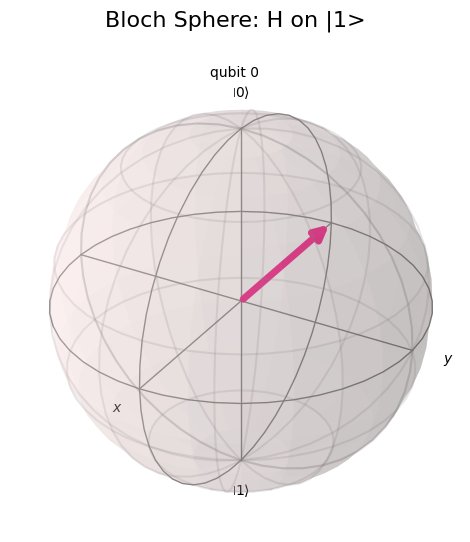

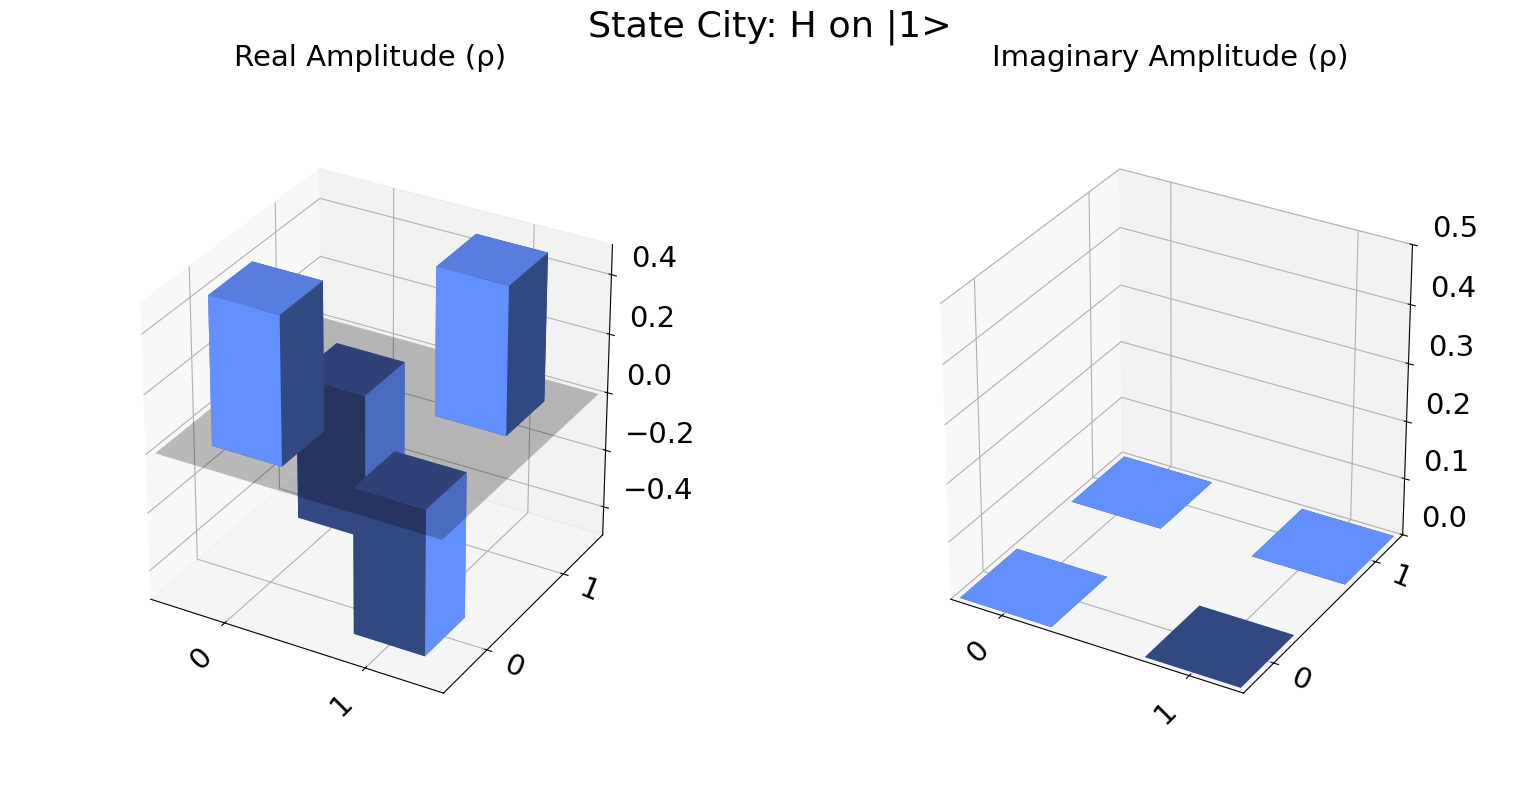

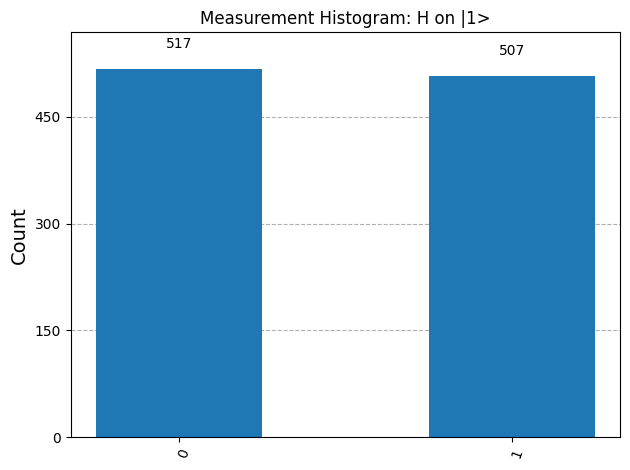



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


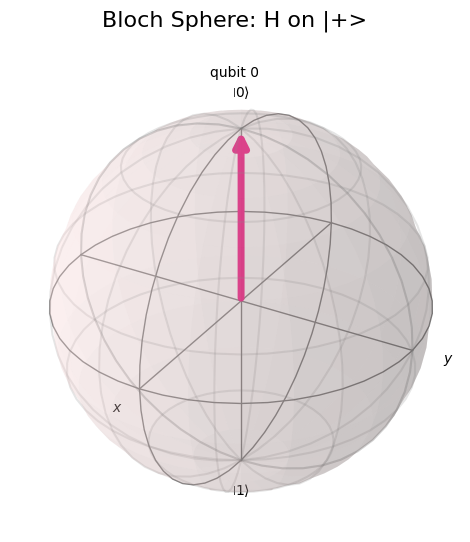

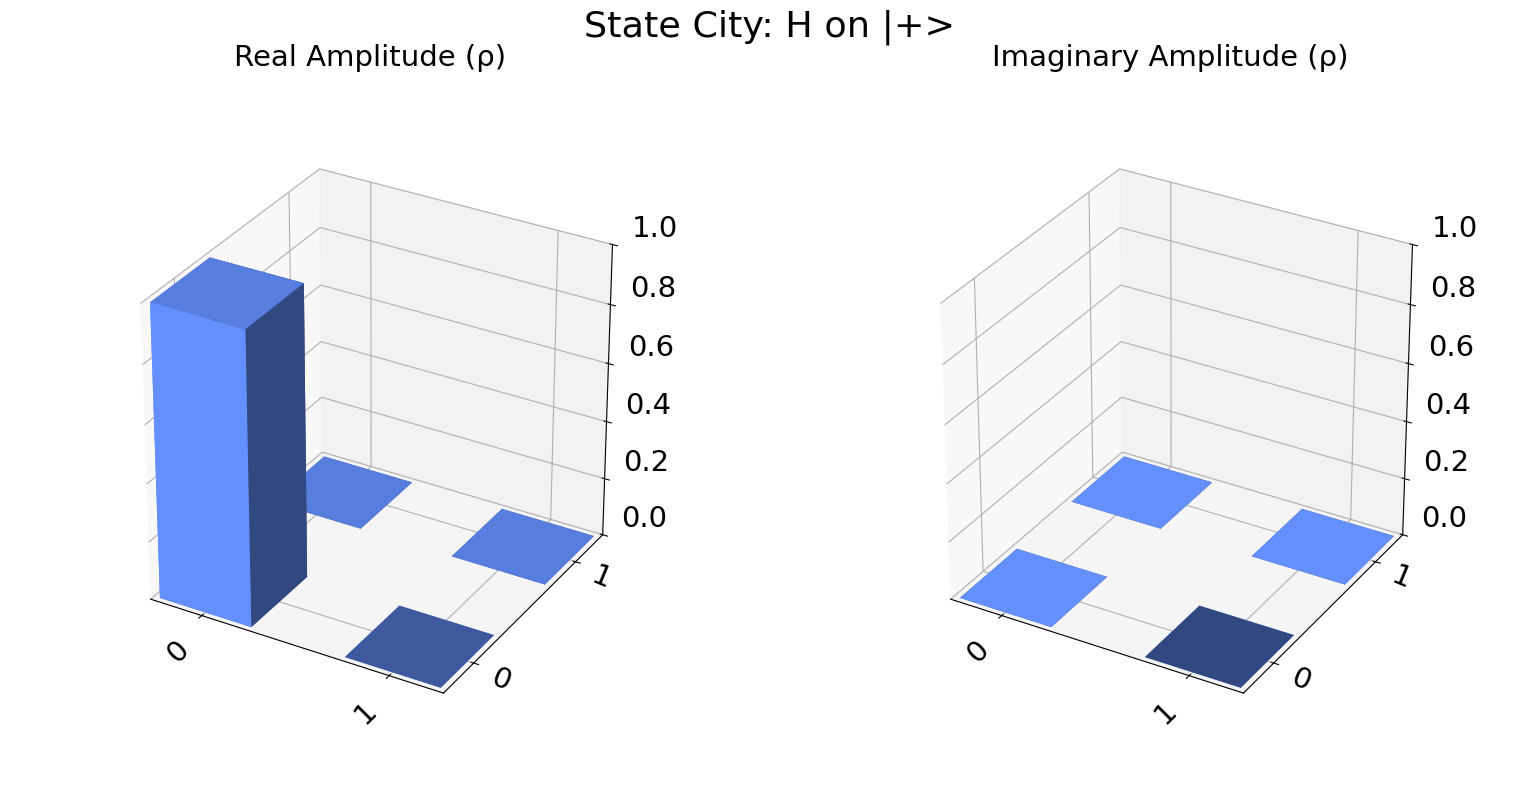

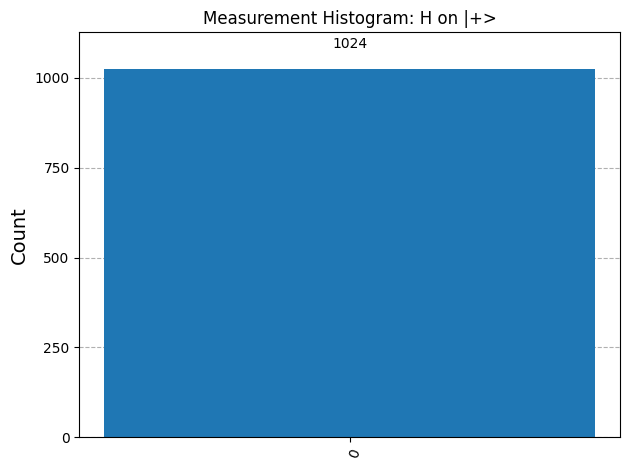



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


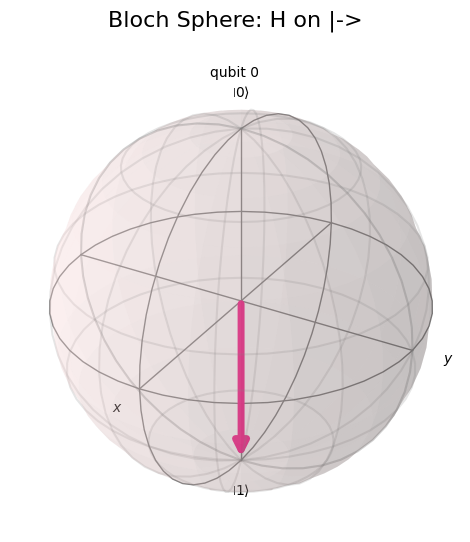

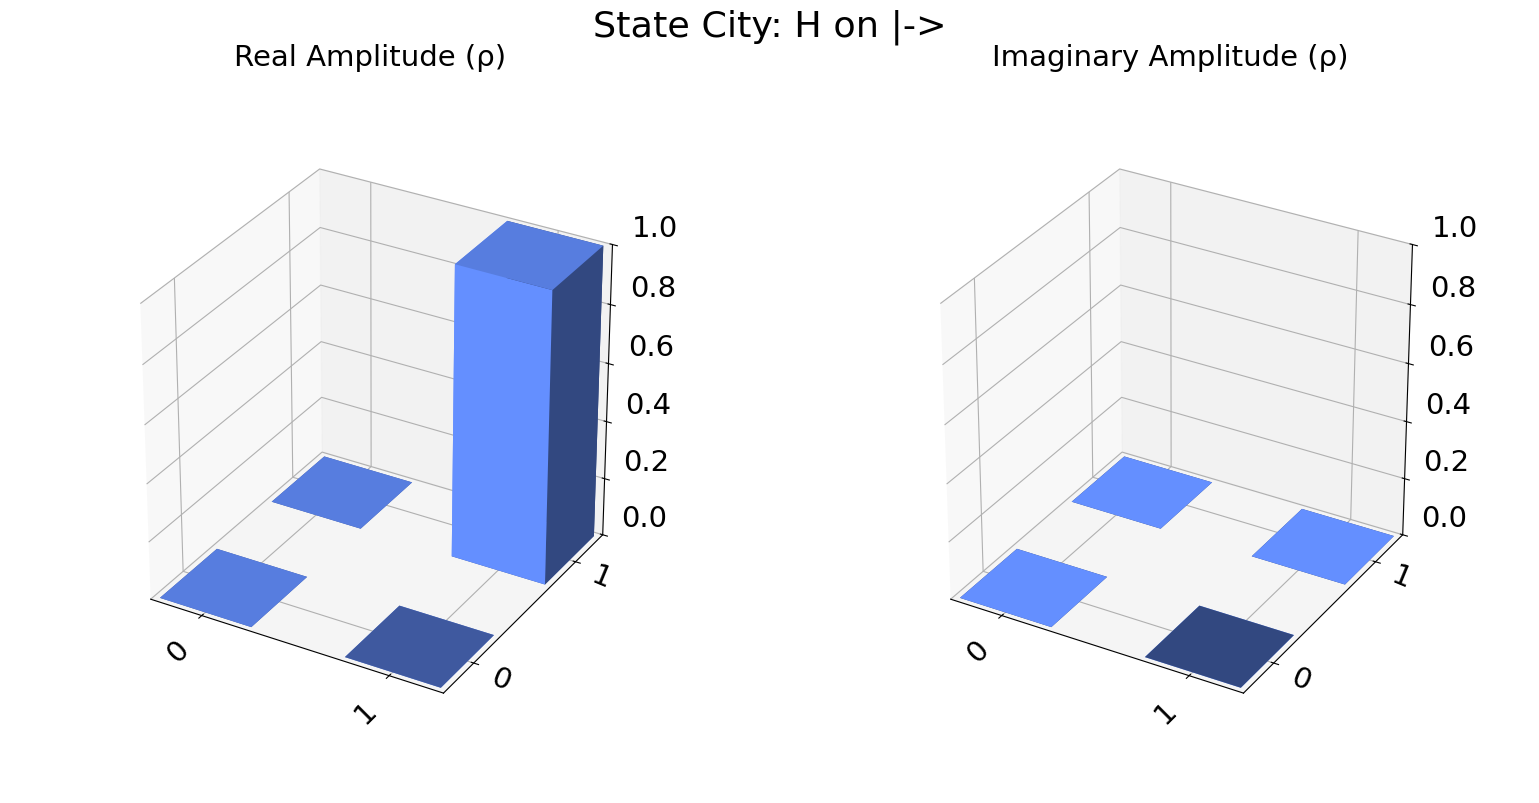

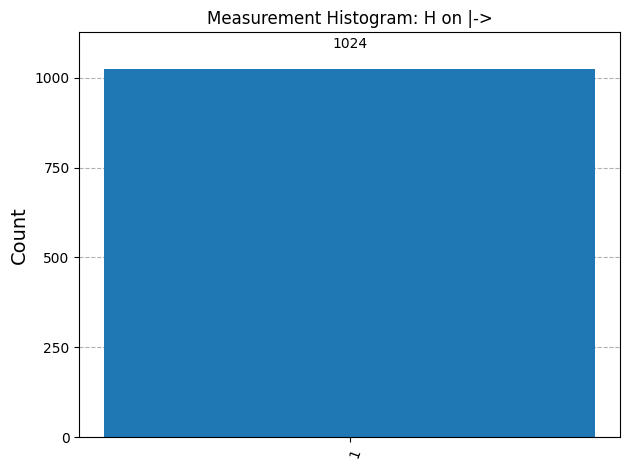

In [7]:
# |0>
visualize_hadamard(np.array([1, 0]), "|0>")

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")

# |+> = (|0> + |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

# |-> = (|0> - |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")

TASK 2

Task 2: Three-Qubit H⊗H⊗H on |000>
Statevector:
[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


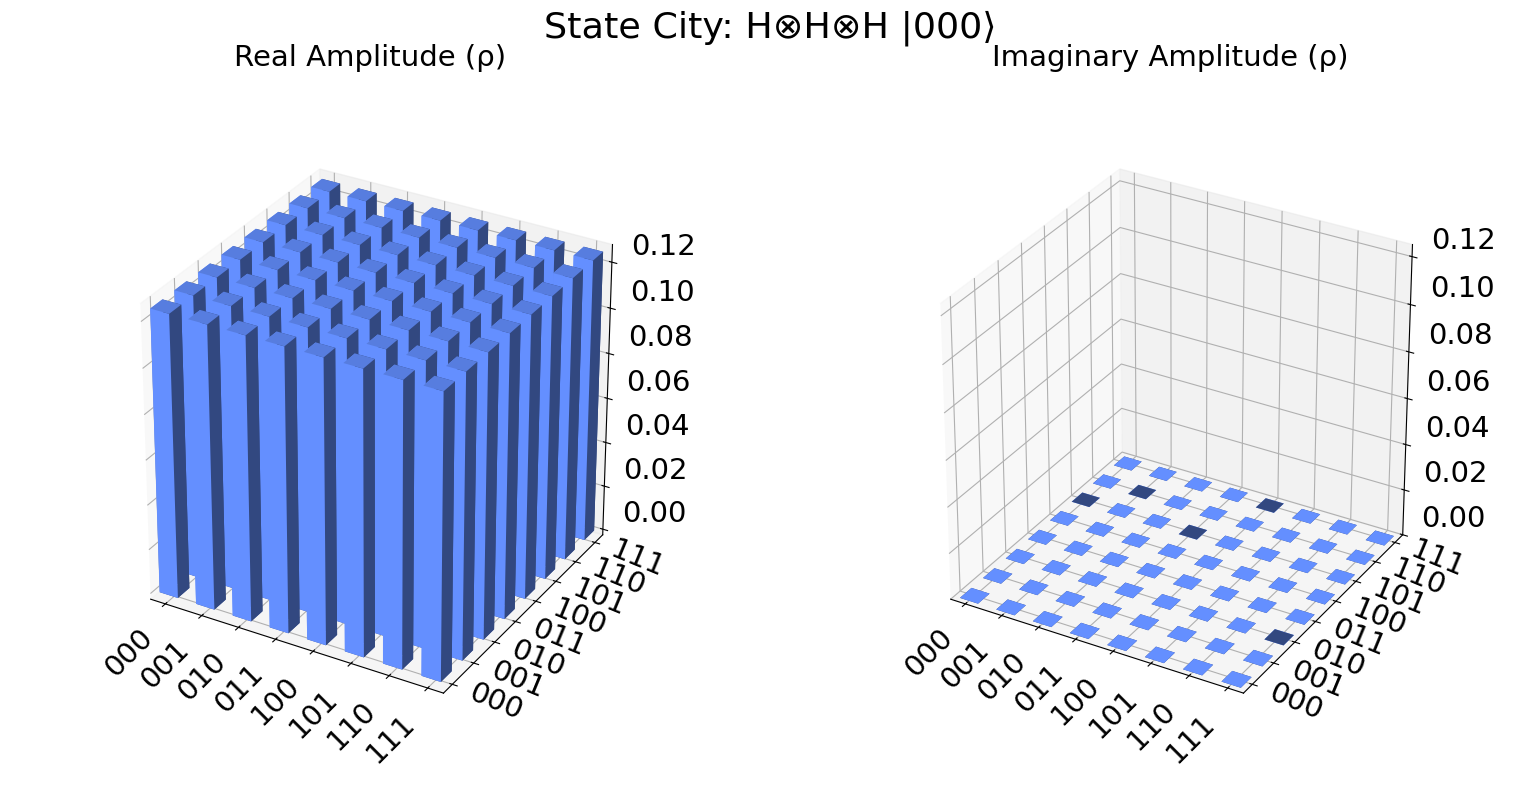

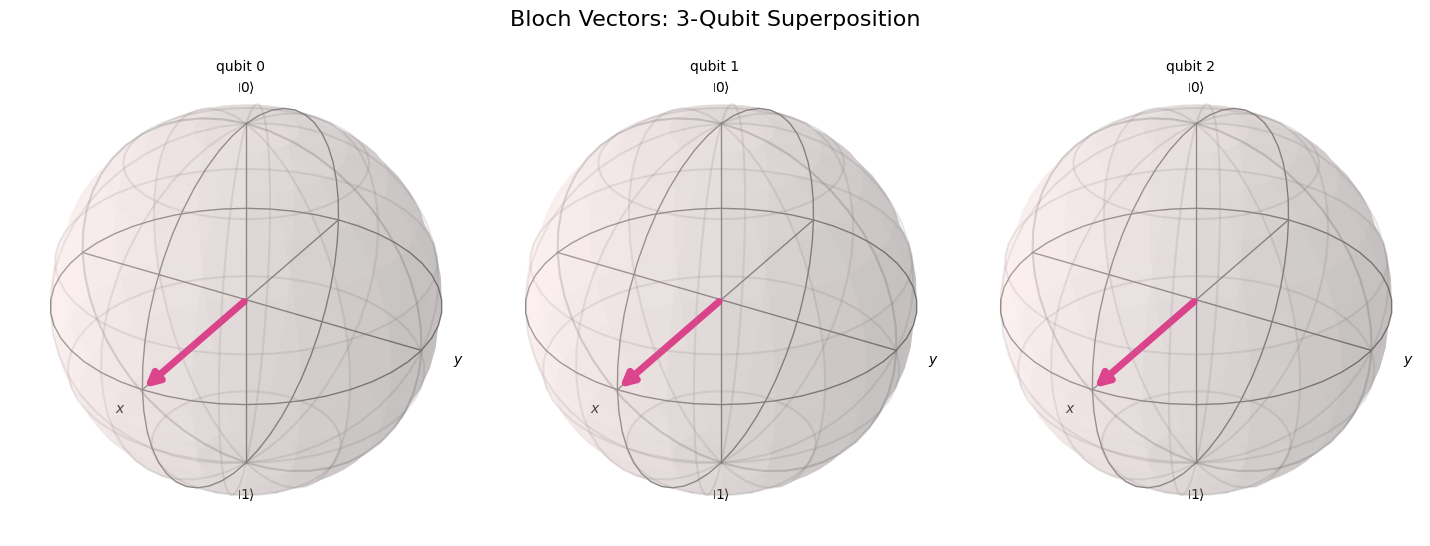

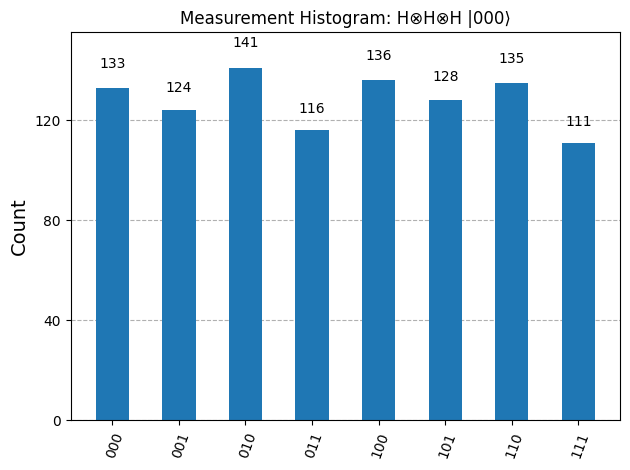


 Analytical Expectation: |000⟩, |001⟩, |010⟩, |011⟩, |100⟩, |101⟩, |110⟩, |111⟩.


In [8]:
# --- Create Quantum Circuit (3 qubits, 3 classical bits) ---
qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)

print("Task 2: Three-Qubit H⊗H⊗H on |000>")
print("Statevector:")
print(state3.data)

display(plot_state_city(state3, title="State City: H⊗H⊗H |000⟩"))
display(plot_bloch_multivector(state3, title="Bloch Vectors: 3-Qubit Superposition"))

sim = AerSimulator()
qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=1024).result()
counts3 = result3.get_counts()

display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H |000⟩"))

print("\n Analytical Expectation: |000⟩, |001⟩, |010⟩, |011⟩, |100⟩, |101⟩, |110⟩, |111⟩.")

TASK 3

Task 3: H + CX + CX on |000> 
Statevector:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


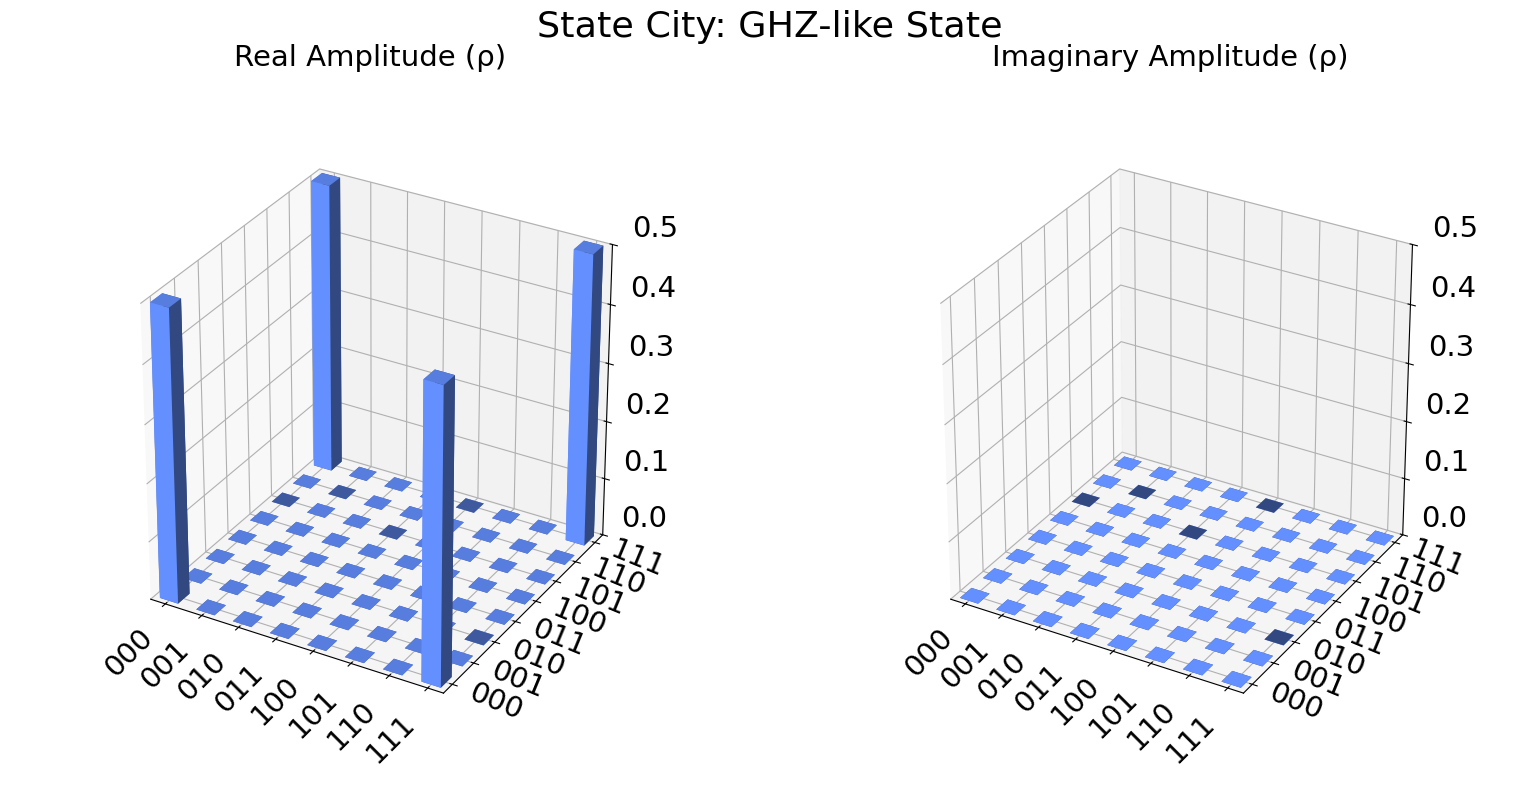

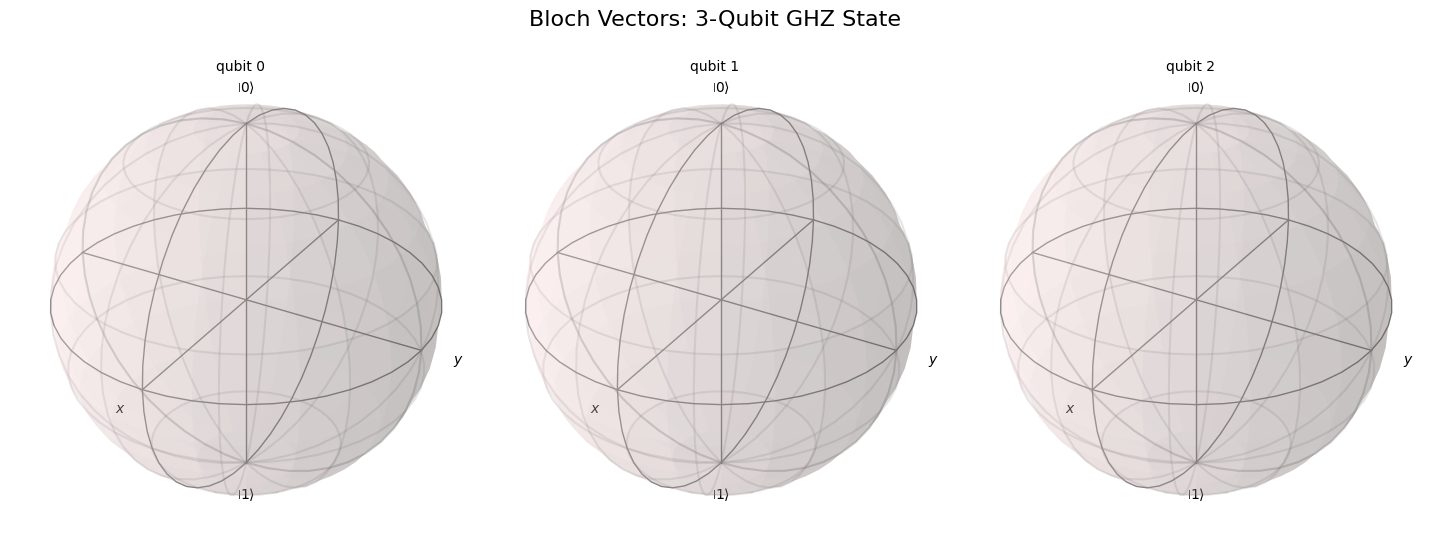

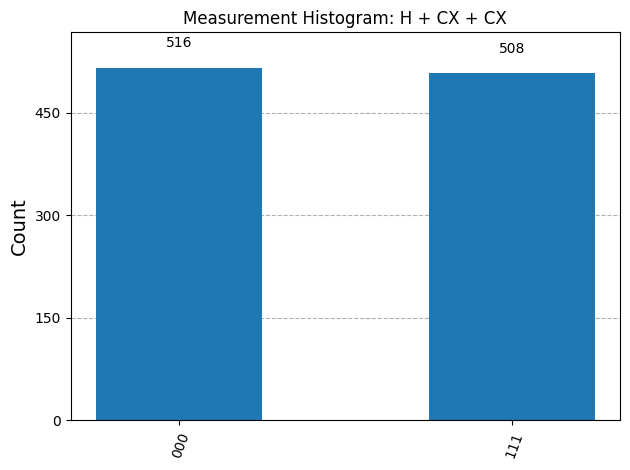

In [9]:
qc4 = QuantumCircuit(3, 3)
qc4.h(0)

# Entangle with two CNOTs (creating GHZ state)
qc4.cx(0, 1)
qc4.cx(0, 2)
qc4.measure([0, 1, 2], [0, 1, 2])

qc4_state = QuantumCircuit(3)
qc4_state.h(0)
qc4_state.cx(0, 1)
qc4_state.cx(0, 2)
state4 = Statevector.from_instruction(qc4_state)

print("Task 3: H + CX + CX on |000> ")
print("Statevector:")
print(state4.data)

display(plot_state_city(state4, title="State City: GHZ-like State"))
display(plot_bloch_multivector(state4, title="Bloch Vectors: 3-Qubit GHZ State"))

sim = AerSimulator()
qc4_t = transpile(qc4, sim)
result4 = sim.run(qc4_t, shots=1024).result()
counts4 = result4.get_counts()

display(plot_histogram(counts4, title="Measurement Histogram: H + CX + CX"))

TASK 4

Task 4: Apply H Twice on |1>
Statevector: [0.+0.j 1.+0.j]


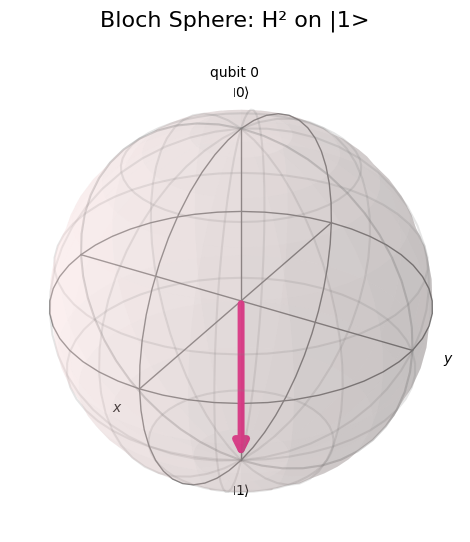

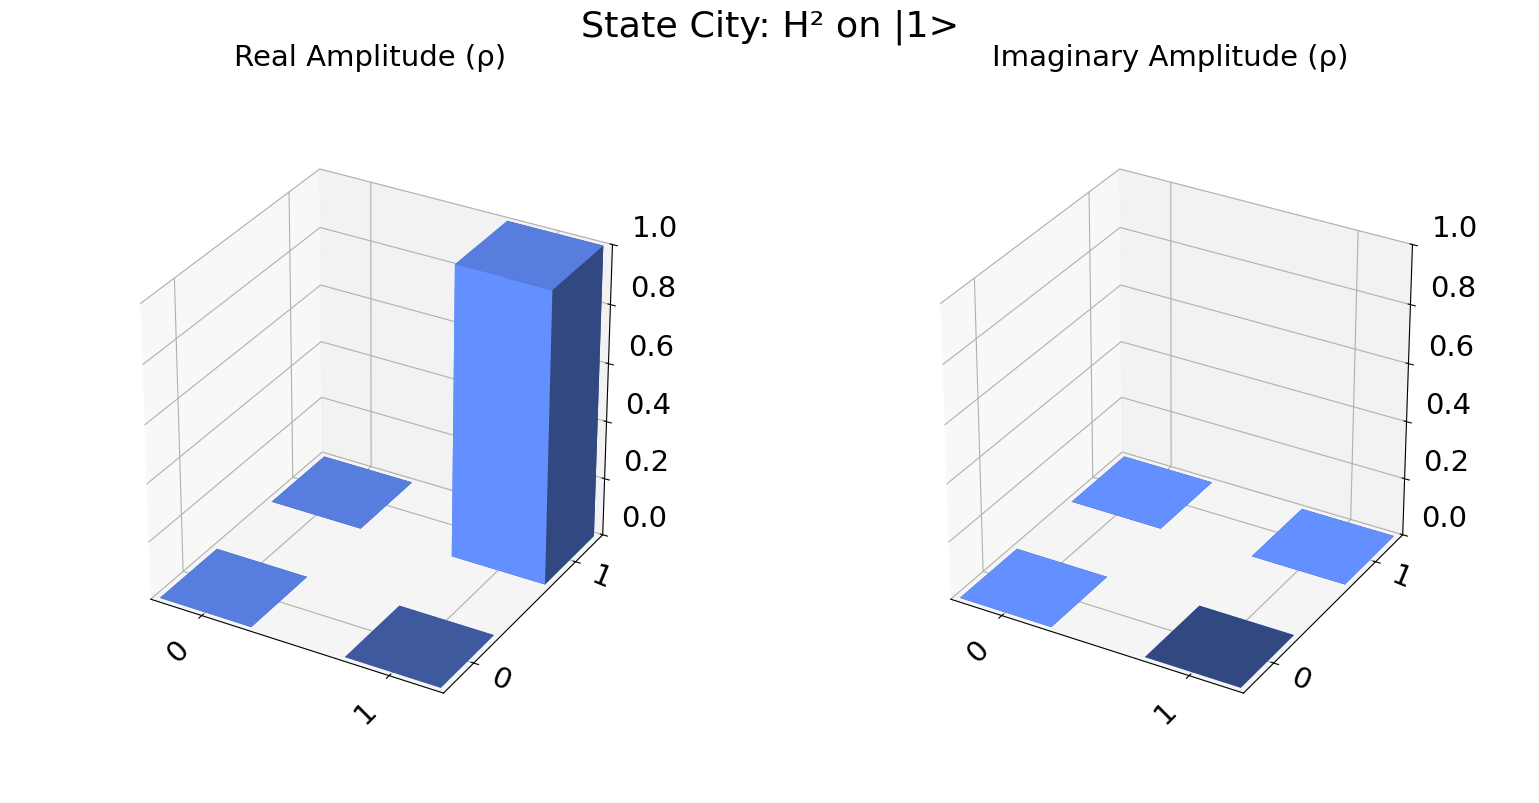

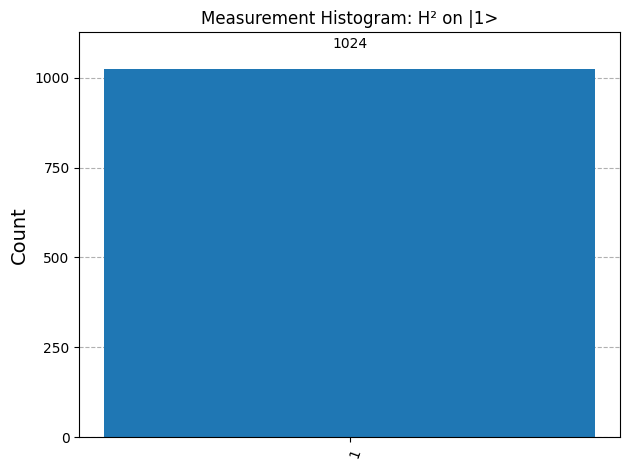

In [10]:
qc5 = QuantumCircuit(1, 1)

qc5.initialize([0, 1], 0)

# Apply two Hadamard gates sequentially
qc5.h(0)
qc5.h(0)

qc5.measure(0, 0)

qc5_state = QuantumCircuit(1)
qc5_state.initialize([0, 1], 0)
qc5_state.h(0)
qc5_state.h(0)
state5 = Statevector.from_instruction(qc5_state)

print("Task 4: Apply H Twice on |1>")
print("Statevector:", state5.data)

display(plot_bloch_multivector(state5, title="Bloch Sphere: H² on |1>"))
display(plot_state_city(state5, title="State City: H² on |1>"))

sim = AerSimulator()
qc5_t = transpile(qc5, sim)
result5 = sim.run(qc5_t, shots=1024).result()
counts5 = result5.get_counts()
display(plot_histogram(counts5, title="Measurement Histogram: H² on |1>"))

TASK 5

Task 5: Qubit Rotation After Hadamard
Statevector after H on |0>: [0.70710678+0.j 0.70710678+0.j]


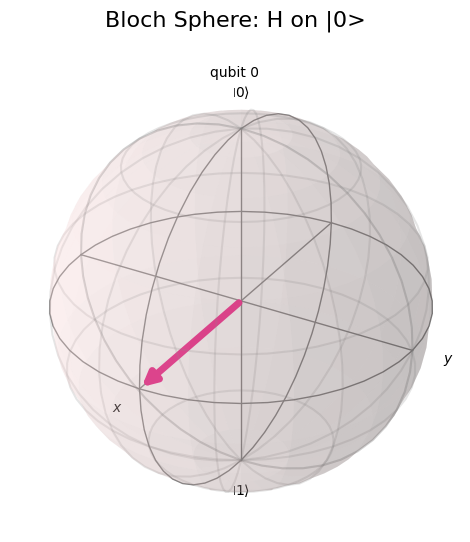

In [11]:
qc6 = QuantumCircuit(1)
qc6.initialize([1, 0], 0)
qc6.h(0)

# Get statevector after H
state6 = Statevector.from_instruction(qc6)

print("Task 5: Qubit Rotation After Hadamard")
print("Statevector after H on |0>:", state6.data)

# Visualization on Bloch sphere
display(plot_bloch_multivector(state6, title="Bloch Sphere: H on |0>"))